In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# DB 연결 및 테이블 생성

In [2]:
db = pymysql.connect(host='localhost', port=3306, user='root', \
                     passwd='starlight0630!', charset='utf8')
cursor = db.cursor()

In [3]:
sql = 'create database IF NOT EXISTS visuallizePjt'
cursor.execute(sql)

1

In [4]:
sql ='use visuallizePjt'
cursor.execute(sql)

0

In [5]:
sql = 'DROP TABLE IF EXISTS REGION_COUNTRY_DEP;'
cursor.execute(sql)

0

In [6]:
sql = '''
CREATE TABLE REGION_COUNTRY_DEP (
    dep_id int not null auto_increment,
    region varchar(10) not null,
    nation varchar(10) not null,
    flights int not null,
    passengers int not null,
    freights int not null,
    primary key(dep_id)
);
'''
cursor.execute(sql)

0

In [7]:
db.commit()
db.close()

# 데이터 로드 및 전처리

In [8]:
df = pd.read_excel("./region_country_dep.xlsx")
df

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,아시아,일본,12044,1541437,147108
2,아시아,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [9]:
# NaN 전처리 -> 괜찮은거 맞는지 확인 
df = df.dropna(axis = 0)
df

,지역,국가,운항(편),여객(명),화물(톤)
1,아시아,일본,12044,1541437,147108
2,아시아,중국,9784,203239,217587
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [10]:
# 소계 행 전처리 ?? ?

# DB Insert

In [11]:
host_name = 'localhost'
host_port = 3306
username = 'root'
password = 'starlight0630!'
database_name = 'visuallizePjt'

In [12]:
db = pymysql.connect(\
                    host = host_name,\
                    port = host_port,\
                    user = username, \
                    passwd = password, \
                    db = database_name, \
                    charset = 'utf8')

In [13]:
cursor = db.cursor()

In [14]:
sql = 'INSERT INTO REGION_COUNTRY_DEP (region, nation, flights, passengers, freights) VALUES (%s, %s, %s, %s, %s)'

In [15]:
for idx in range(len(df)) :
    cursor.execute(sql, tuple(df.values[idx]))

In [16]:
sql = "select * from region_country_dep;"
cursor.execute(sql)
result = cursor.fetchall()
result

((1, '아시아', '일본', 12044, 1541437, 147108),
 (2, '아시아', '중국', 9784, 203239, 217587),
 (3, '아시아', '네팔', 97, 10627, 965),
 (4, '아시아', '대만', 3003, 138595, 50519),
 (5, '아시아', '라오스', 244, 28909, 702),
 (6, '아시아', '말레이시아', 1726, 174841, 29288),
 (7, '아시아', '몽골', 1084, 146930, 8910),
 (8, '아시아', '미얀마', 223, 18624, 771),
 (9, '아시아', '방글라데시', 52, 4212, 222),
 (10, '아시아', '베트남', 10449, 1475633, 137705),
 (11, '아시아', '브루나이', 14, 1107, 23),
 (12, '아시아', '스리랑카', 64, 10755, 946),
 (13, '아시아', '싱가포르', 2703, 524723, 53927),
 (14, '아시아', '인도', 295, 40419, 4731),
 (15, '아시아', '인도네시아', 912, 165309, 16510),
 (16, '아시아', '캄보디아', 682, 106191, 3769),
 (17, '아시아', '태국', 4137, 781678, 36281),
 (18, '아시아', '투르크매니스탄', 0, 0, 0),
 (19, '아시아', '필리핀', 4515, 733953, 33166),
 (20, '아시아', '홍콩', 3031, 111321, 108830),
 (21, '미주', '멕시코', 200, 6286, 3172),
 (22, '미주', '미국', 20592, 1385933, 454028),
 (23, '미주', '브라질', 153, 0, 3184),
 (24, '미주', '캐나다', 1424, 241287, 24978),
 (25, '유럽', '네덜란드', 512, 67721, 14898),
 (26, '유럽'

In [17]:
db.commit()
db.close()

# 시각화

In [18]:
db = pymysql.connect(\
                    host = host_name,\
                    port = host_port,\
                    user = username, \
                    passwd = password, \
                    db = database_name, \
                    charset = 'utf8')

In [40]:
sql = "select * from region_country_dep"
df = pd.read_sql(sql,db)
df

C:\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dep_id,region,nation,flights,passengers,freights
0,1,아시아,일본,12044,1541437,147108
1,2,아시아,중국,9784,203239,217587
2,3,아시아,네팔,97,10627,965
3,4,아시아,대만,3003,138595,50519
4,5,아시아,라오스,244,28909,702
...,...,...,...,...,...,...
62,63,기타,이스라엘,5,606,60
63,64,기타,이집트,0,0,0
64,65,기타,카타르,574,115146,27093
65,66,기타,케냐,0,0,0


## 비행기가 가장 많이 출발한 대륙

In [97]:
# 단순 합 : 비행기 편수의 단순 합을 이용한 결과
f_result1 = df.groupby('region').sum('flights').reset_index()
f_result1

,region,dep_id,flights,passengers,freights
0,기타,738,1684,386737,46704
1,대양주,265,3540,589456,22143
2,미주,90,22369,1633506,485362
3,아시아,210,55059,6218503,851960
4,유럽,975,9062,987191,251980


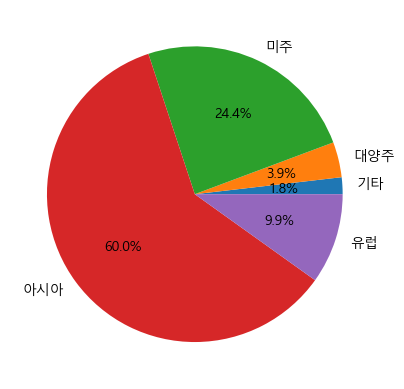

In [99]:
plt.pie(f_result1['flights'], labels = f_result1['region'], autopct='%.1f%%')
plt.show()

---
**result**
- 단순 합을 이용한 통계 결과, 국가 수가 많은 아시아가 과반수를 넘는 모습을 보임
- 국가 수가 적은 대륙이 불리하다고 생각하여 평균을 이용한 결과를 도출해보기로 결정
---

In [100]:
# 평균 값 : 각 대륙별 출발한 비행기 수의 평균 이용
f_result2 = df.groupby('region').mean('flights').reset_index()
f_result2

,region,dep_id,flights,passengers,freights
0,기타,61.5,140.333333,32228.083333,3892.000000
1,대양주,53.0,708.000000,117891.200000,4428.600000
2,미주,22.5,5592.250000,408376.500000,121340.500000
3,아시아,10.5,2752.950000,310925.150000,42598.000000
4,유럽,37.5,348.538462,37968.884615,9691.538462


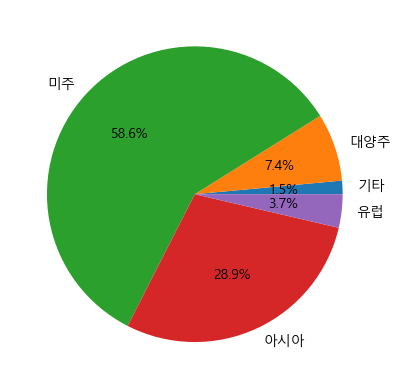

In [101]:
plt.pie(f_result2['flights'], labels = f_result2['region'], autopct='%.1f%%')
plt.show()

---
**result**
- 국가 수가 적었던 미주의 비율이 눈에 띄게 늘어남
- 평균을 이용한 결과를 통해 보았을 때 절대적인 항공편수는 아시아가 압도적으로 많지만, 그 비율은 미주가 많은 것으로 결론 도출
---

## 승객 수가 가장 많이 출발한 대륙

In [102]:
# 단순 합 : 승객 수의 단순 합을 이용한 결과
p_result1 = df.groupby('region').sum('passengers').reset_index()
p_result1

,region,dep_id,flights,passengers,freights
0,기타,738,1684,386737,46704
1,대양주,265,3540,589456,22143
2,미주,90,22369,1633506,485362
3,아시아,210,55059,6218503,851960
4,유럽,975,9062,987191,251980


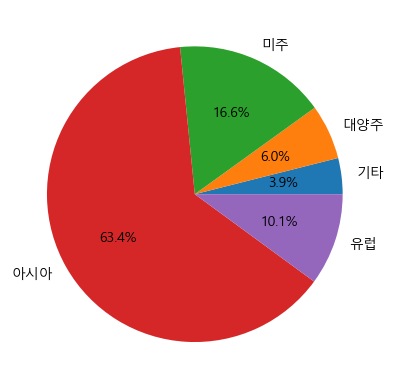

In [103]:
plt.pie(p_result1['passengers'], labels = p_result1['region'], autopct='%.1f%%')
plt.show()

---
**result**
- 승객 수의 단순 합을 이용한 동계 결과, 대륙 수가 많은 아시아의 비율이 압도적으로 많음
- 국가 수가 적은 대륙이 불리하다고 판단하여 평균값을 이용하기로 결정
---

In [106]:
# 평균 값 : 각 대륙별 출발한 승객 수의 평균 이용
p_result2 = df.groupby('region').mean('passengers').reset_index()
p_result2

,region,dep_id,flights,passengers,freights
0,기타,61.5,140.333333,32228.083333,3892.000000
1,대양주,53.0,708.000000,117891.200000,4428.600000
2,미주,22.5,5592.250000,408376.500000,121340.500000
3,아시아,10.5,2752.950000,310925.150000,42598.000000
4,유럽,37.5,348.538462,37968.884615,9691.538462


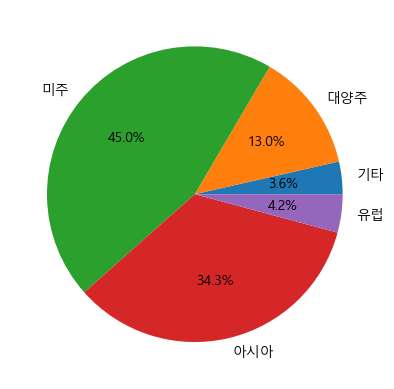

In [107]:
plt.pie(p_result2['passengers'], labels = p_result2['region'], autopct='%.1f%%')
plt.show()

---
**result**
- 평균값을 이용한 통계 결과, 앞서 비행기 편수가 많았던 미주의 승객 비율이 늘어난 모습을 보임
- 그럼에도 아시아의 승객 비율이 비행기의 비율보다 높은 것으로 보아 아시아로의 승객이 많은 것을 알 수 있음
---